## Group combining logic:
* Find top 10 words for groups which have observations more than 80 (88% of the data) and top 5 words for groups which have observations lower than 80 using wordcloud.
* Each group (GRP_0 to GRP_73) will be represented by their top words
* Use k-means clustering to combine groups with similar top words (vectorization using count vectorizer). 
* Tried with 30 clusters 
* Renamed the clusters to denote group names they consist of

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [80]:
dfs = pd.read_excel("input_data.xlsx")

In [81]:
dfs.head(20)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/,"event: critical:HostName_221.company.com the value of mountpoint threshold for /oracle/SID_37/erpdata21/sr3psa1d_7/sr3psa1d.data7,perpsr3psa1d,4524 is 98",jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-employee [enter user's name],ticket_no1550391- employment status - new non-employee [enter user's name],eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [82]:
dfs["Assignment group"].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_23      25
GRP_62      25
GRP_48      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_46       6
GRP_49       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_63       3
GRP_68       3
GRP_56       3
GRP_38       3
GRP_58       3
GRP_54       2
GRP_72       2
GRP_71       2
GRP_69    

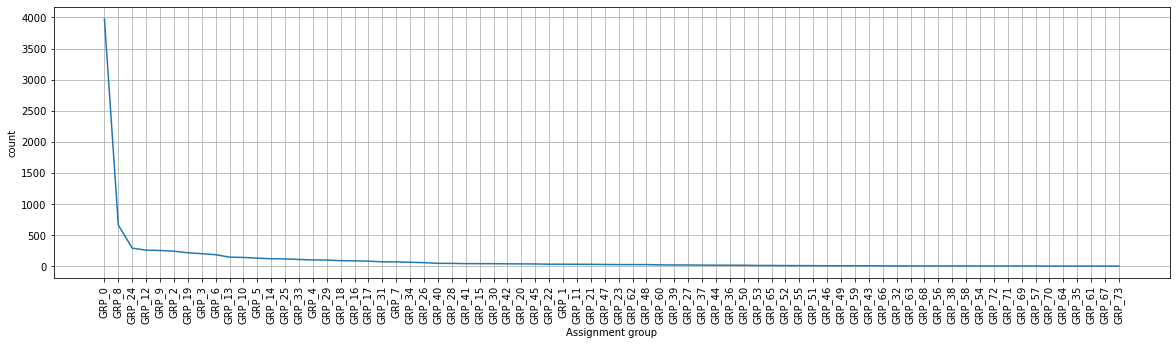

In [83]:
plt.subplots(figsize = (20,5))
plt.xticks(rotation=90)
plt.plot(dfs["Assignment group"].value_counts())
plt.xlabel("Assignment group")
plt.ylabel("count")
plt.grid()
plt.show()

In [84]:
dfs.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [85]:
dfs[dfs.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,"_x000D_\n_x000D_\nreceived from: ohdrnswl.rezuibdt@gmail.com_x000D_\n_x000D_\nhi,_x000D_\n_x000D_\n_x000D_\n_x000D_\nlink is not working. kindly resolve yhe issue on urgent basis._x000D_\n_x000D_\n_x000D_\n_x000D_\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,_x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the portal._x000D_\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connected to the user system using teamviewer._x000D_\n-help the user login to the company vpn using the vpn company vpn link._x000D_\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"_x000D_\n_x000D_\nreceived from: eqmuniov.ehxkcbgj@gmail.com_x000D_\n_x000D_\ngood morning,_x000D_\n_x000D_\nwhen trying to log on to erp i get this error below._x000D_\nplease help urgently as i can not process customer order._x000D_\n_x000D_\n[cid:image001.png@01d20f2e.751db880]_x000D_\n_x000D_\n_x000D_\n",eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [86]:
duplicate_df=dfs[dfs.duplicated(subset = None, keep = 'first')]

In [87]:
duplicate_df.shape

(83, 4)

In [88]:
#duplicate_df

In [89]:
#drop NaNs and duplicate rows
dfs.dropna(inplace=True)

In [90]:
dfs.shape

(8491, 4)

In [91]:
dfs.drop_duplicates(subset = None, keep = 'first',inplace=True)

In [92]:
dfs.shape

(8408, 4)

In [93]:
dfs.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)_x000D_\n-checked the user name in ad and reset the password._x000D_\n-advised the user to login and check._x000D_\n-caller confirmed that he was able to login._x000D_\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"_x000D_\n_x000D_\nreceived from: hmjdrvpb.komuaywn@gmail.com_x000D_\n_x000D_\nhello team,_x000D_\n_x000D_\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_\n_x000D_\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqkwiam@gmail.com_x000D_\n_x000D_\nhi_x000D_\n_x000D_\ni cannot log on to vpn_x000D_\n_x000D_\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [94]:
#preprocess and clean the data
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

#define a function for preprocessing the data
def preprocess_text(df, column_name=''):
    
    # Remove email Ids
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]{2,4}',' ',x))
    
    # Remove label url link
    df[column_name]=df[column_name].apply(lambda x: re.sub(r'urlLink|urllink','',x))
    
    # remove all the places where that starts with http or https
    df[column_name]=df[column_name].apply(lambda x: re.sub(r'https?\S+','',x))   
    
    df[column_name] = df[column_name].apply((lambda x: re.sub(r'([xx]+)|([XX]+)|(\d+)', '',x)))
    df[column_name] = df[column_name].apply((lambda x: re.sub(r'[_D_\n_D_\n]', '',x)))


    
    # Strip unwanted spaces
    df[column_name] = df[column_name].apply(lambda x: x.strip())
    
    # Select only alphabets
    df[column_name] = df[column_name].apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))
  
    # Convert text to lowercase
    df[column_name] = df[column_name].apply(lambda x: x.lower())

    # Remove stopwords
    df[column_name] = df[column_name].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

    #Remove hello
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'hello |please |received |unable |see |help |received |need |sent |yes |no |na ', ' ', x))
    
    # Replace empty strings with Null
    df[column_name].replace('', np.nan, inplace = True)
    
    # Drop Null values
    df = df.dropna()

    return df


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sango\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
dfs = preprocess_text(dfs, column_name='Description')

In [96]:
dfs = preprocess_text(dfs, column_name='Short description')

In [97]:
##### Another built in function to pre-process the text with stemming, lemmitization and others
#stemming was leading to invalid words like 'unabl', issu','verifi' etc. Hence used lematization only

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def lemmitize(sentence):
    sentence=str(sentence)
    # sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)  
    # filtered_words = [w for w in tokens if len(w) >= 2 if not w in stopwords.words('english')]
    #stem_words = [stemmer.stem(w) for w in tokens]
    lemma_words = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(lemma_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sango\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sango\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [98]:
dfs['Short description'] = dfs['Short description'].apply(lambda s:lemmitize(s))

In [99]:
dfs['Description'] = dfs['Description'].apply(lambda s:lemmitize(s))

In [100]:
dfs.head(20)

,Short description,Description,Caller,Assignment group
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,spxjnwir pjlcoqds,GRP_0
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,hmjdrvpb komuaywn,GRP_0
2,cant log vpn,hii cannot log vpnbest,eylqgodm ybqkwiam,GRP_0
3,access hrtool page,access hrtool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,log engineering tool skype,log engineering tool skype,eflahbxn ltdgrvkz,GRP_0
6,event critical hostname company com value mountpoint threshold oracle si erpdata,event critical hostname company com value mountpoint threshold oracle si erpdata srpsad srpsad data perpsrpsad,jyoqwxhz clhxsoqy,GRP_1
7,ticket employment status new non employee enter user name,ticket employment status new non employee enter user name,eqzibjhw ymebpoih,GRP_0
8,disable add in outlook,disable add in outlook,mdbegvct dbvichlg,GRP_0
9,ticket update inplant,ticket update inplant,fumkcsji sarmtlhy,GRP_0


In [101]:
dfs.shape

(8310, 4)

In [102]:
## Group by Categories
df_grp = dfs.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

,Assignment group,counts
0,GRP_0,3919
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,257
5,GRP_13,144
6,GRP_14,118
7,GRP_15,38
8,GRP_16,85
9,GRP_17,25


In [103]:
#concatenate the columns Short Description and Description
#Before concatenating, if Description and Short Description have same text, make Description column blank
for i in range(len(dfs)):
    if(dfs.iloc[i, 0]== dfs.iloc[i, 1]):
        dfs.iloc[i,1]="" 

dfs["issue_description"]=dfs["Short description"] + " " + dfs["Description"]
#dfs= pd.DataFrame({"issue_description": dfs["Short description"] + " " + dfs["Description"],"Assignment group": dfs["Assignment group"]}, 
                                                       #columns=["issue_description","Assignment group"])

In [104]:
dfs.head(20)

,Short description,Description,Caller,Assignment group,issue_description
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,spxjnwir pjlcoqds,GRP_0,login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,hmjdrvpb komuaywn,GRP_0,outlook team meeting skype meeting etc appearing outlook calendar somebody advise correct kind
2,cant log vpn,hii cannot log vpnbest,eylqgodm ybqkwiam,GRP_0,cant log vpn hii cannot log vpnbest
3,access hrtool page,,xbkucsvz gcpydteq,GRP_0,access hrtool page
4,skype error,,owlgqjme qhcozdfx,GRP_0,skype error
5,log engineering tool skype,,eflahbxn ltdgrvkz,GRP_0,log engineering tool skype
6,event critical hostname company com value mountpoint threshold oracle si erpdata,event critical hostname company com value mountpoint threshold oracle si erpdata srpsad srpsad data perpsrpsad,jyoqwxhz clhxsoqy,GRP_1,event critical hostname company com value mountpoint threshold oracle si erpdata event critical hostname company com value mountpoint threshold oracle si erpdata srpsad srpsad data perpsrpsad
7,ticket employment status new non employee enter user name,,eqzibjhw ymebpoih,GRP_0,ticket employment status new non employee enter user name
8,disable add in outlook,,mdbegvct dbvichlg,GRP_0,disable add in outlook
9,ticket update inplant,,fumkcsji sarmtlhy,GRP_0,ticket update inplant


### ADD a column containing lenth of sentences

In [105]:
dfs['description_length'] = dfs.issue_description.str.split().str.len()

In [106]:
dfs['description_length'].max()

1000

In [107]:
dfs['description_length'].mean()

18.65282791817088

In [108]:
dfs['description_length'].quantile([0,.95])

0.00     1.0
0.95    60.0
Name: description_length, dtype: float64

In [109]:
!pip install wordcloud
import heapq
from wordcloud import WordCloud
## function to create Word Cloud
def show_wordcloud(data, groupName, n_words):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    #print(list(wordcloud.words_.keys())[0:n_words])
    return list(wordcloud.words_.keys())[0:n_words]
                

"""
    #type(wordcloud.words_.keys())
    print("Top words are: ", list(wordcloud.words_.keys())[0: 10])
    
    fig = plt.figure(1, figsize=(15, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
    rel_freq=wordcloud.words_
    
    names = list(rel_freq.keys())
    values = list(rel_freq.values())
    #plt.rcParams["figure.figsize"] = (10, 5)
    plt.bar(range(20), values[:20], tick_label=names[:20])
    plt.xticks(rotation=90)
    plt.title(groupName + " top word count")
    plt.show()
"""

'\n    #type(wordcloud.words_.keys())\n    print("Top words are: ", list(wordcloud.words_.keys())[0: 10])\n    \n    fig = plt.figure(1, figsize=(15, 12))\n    plt.axis(\'off\')\n    if title: \n        fig.suptitle(title, fontsize=20)\n        fig.subplots_adjust(top=2.3)\n\n    plt.imshow(wordcloud)\n    plt.show()\n    \n    \n    rel_freq=wordcloud.words_\n    \n    names = list(rel_freq.keys())\n    values = list(rel_freq.values())\n    #plt.rcParams["figure.figsize"] = (10, 5)\n    plt.bar(range(20), values[:20], tick_label=names[:20])\n    plt.xticks(rotation=90)\n    plt.title(groupName + " top word count")\n    plt.show()\n'

In [110]:
#Add a column "top_words" to df_grp table which contains list of top words for each group using word cloud
#will use top 10 words for groups with more observations and top 5 words for groups with less observations
df_grp["top_words"] = ""
for i in range(len(df_grp)):
    groupName=df_grp.iloc[i,0]
    if(df_grp.iloc[i,1]>=80):
        #print(groupName,":\n")
        text_Str1 = dfs['issue_description'][dfs['Assignment group'].isin([groupName])].tolist()
        df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName,n_words= 10)    
    else:
        text_Str1 = dfs['issue_description'][dfs['Assignment group'].isin([groupName])].tolist()
        df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName, n_words=5)  

<ipython-input-110-31614f54e57b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName,n_words= 10)
<ipython-input-110-31614f54e57b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grp['top_words'][i]=show_wordcloud(text_Str1, groupName, n_words=5)


In [111]:
df_grp

,Assignment group,counts,top_words
0,GRP_0,3919,"[password reset, access, outlook, erp si, erp, issue, email, vpn, reset password, account locked]"
1,GRP_1,31,"[hostname, space consumed, consumed space, space available, job]"
2,GRP_10,140,"[failed jobscheduler, jobscheduler job, job hrpayrollnau, hrpayrollnau failed, erp, inwarehousetool, job job, job failed, account, payment]"
3,GRP_11,30,"[erp, engineering tool, drawing, plm, material]"
4,GRP_12,257,"[hostname, server, asa deny, deny tcp, tcp src, src inside, inside dst, dst outside, outside access, access group]"
5,GRP_13,144,"[inwarehousetool, order, erp, customer, item, issue, workflow, error, delivery, cannot]"
6,GRP_14,118,"[erp, hostname, si, issue, server, error, system, production, alwaysupservice ee, team]"
7,GRP_15,38,"[crm, account, employee, erp crm, email]"
8,GRP_16,85,"[collaborationplatform, access, file, user, issue, hub, company, link, email, site]"
9,GRP_17,25,"[reset password, password reset, passwordmanagementtool password, using passwordmanagementtool, erp]"


In [112]:
df_grp['top_words']=df_grp['top_words'].apply(lambda x:' '.join(str(e)for e in x))

In [113]:
df_grp.head()

,Assignment group,counts,top_words
0,GRP_0,3919,password reset access outlook erp si erp issue email vpn reset password account locked
1,GRP_1,31,hostname space consumed consumed space space available job
2,GRP_10,140,failed jobscheduler jobscheduler job job hrpayrollnau hrpayrollnau failed erp inwarehousetool job job job failed account payment
3,GRP_11,30,erp engineering tool drawing plm material
4,GRP_12,257,hostname server asa deny deny tcp tcp src src inside inside dst dst outside outside access access group


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer_cv = TfidfVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(df_grp['top_words'])

In [115]:
matrix=pd.concat([df_grp['top_words'],pd.DataFrame(X_cv.toarray(), columns=vectorizer_cv.get_feature_names_out())], axis=1)
matrix

,top_words,abended,access,account,aclinside,admin,agent,ahrskvlnregional,alert,alwaysupservice,analytics,android,anftgup,apac,app,asa,assignment,available,baadea,backup,batch,bitte,bobj,calibration,call,cannot,card,change,charm,cid,circuit,client,co,collaborationplatform,com,company,complete,computer,confirmation,consumed,contact,cost,course,create,crm,customer,cutview,data,database,datacenter,de,defekt,delete,delivery,deny,deployment,der,dev,die,disk,distributortool,dn,dob,drawing,drucker,dst,ec,edi,ee,em,email,emea,employee,engg,engineering,engineeringtool,enter,epense,erp,error,et,ethic,eutool,event,ewew,failed,file,finance,financeapp,fnqelwpk,folder,following,forbidden,forecast,galay,germany,gkad,globaltelecom,gr,group,ha,hgaycze,hgayczeing,host,hostname,hpqc,hrpayrollnau,hub,id,ie,ignore,inside,install,inwarehousetool,ip,issue,item,job,jobscheduler,kp,laptop,lauacyltoe,link,locked,login,mail,maintenance,manager,material,medium,message,michjnfyele,mii,missing,mit,mm,monitoringtool,name,network,new,nicht,note,number,oneteam,order,outage,outlook,outside,page,password,passwordmanagementtool,payment,pc,per,phone,plant,plm,po,portal,pr,price,print,printer,pro,problem,probleme,processor,product,production,purchasing,pz,quote,rechner,rejected,report,required,reset,responding,running,say,schedule,scheduled,search,selector,send,sep,server,setup,ship,shipping,shopfloorapp,si,sicold,sinkhole,site,skype,slow,space,src,srvlavpwdrprd,sso,sto,stock,stopped,submit,sw,switch,symantec,system,tcp,team,telecomvendor,telephonysoftware,ticket,ticketingtool,time,tool,training,tried,type,uacyltoe,und,update,usa,user,using,version,via,virus,vpn,wg,wifi,workflow,working,www
0,password reset access outlook erp si erp issue email vpn reset password account locked,0.000000,0.170938,0.209382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.294743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170938,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.262001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.262001,0.000000,0.000000,0.488271,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.244135,0.000000,0.000000,0.000000,0.000000,0.000000
1,hostname space consumed consumed space space available job,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [116]:
# k means clustering to combine groups
from sklearn.cluster import KMeans
kmeans_30 = KMeans(n_clusters=30, random_state=42)
kmeans_30.fit(X_cv)
#final_cluster = pd.concat([df_grp,pd.DataFrame(X_cv.toarray(),columns=vectorizer_cv.get_feature_names_out())],axis=1)
df_grp['Cluster_30'] = kmeans_30.predict(X_cv)

In [117]:
df_grp.head()

,Assignment group,counts,top_words,Cluster_30
0,GRP_0,3919,password reset access outlook erp si erp issue email vpn reset password account locked,20
1,GRP_1,31,hostname space consumed consumed space space available job,27
2,GRP_10,140,failed jobscheduler jobscheduler job job hrpayrollnau hrpayrollnau failed erp inwarehousetool job job job failed account payment,3
3,GRP_11,30,erp engineering tool drawing plm material,28
4,GRP_12,257,hostname server asa deny deny tcp tcp src src inside inside dst dst outside outside access access group,13


In [118]:
#Renaming the clusters 
df_grp['Assignment group_temp'] = df_grp['Assignment group'].transform(lambda x: x[4:])
df_grp['Combined_grps'] = df_grp.groupby(['Cluster_30'])['Assignment group_temp'].transform(lambda x: '_'.join(x[:])).transform(lambda x: 'G_' + x)

In [119]:
df_grp

,Assignment group,counts,top_words,Cluster_30,Assignment group_temp,Combined_grps
0,GRP_0,3919,password reset access outlook erp si erp issue email vpn reset password account locked,20,0,G_0_17
1,GRP_1,31,hostname space consumed consumed space space available job,27,1,G_1_65
2,GRP_10,140,failed jobscheduler jobscheduler job job hrpayrollnau hrpayrollnau failed erp inwarehousetool job job job failed account payment,3,10,G_10_47_5_57_6_60_8_9
3,GRP_11,30,erp engineering tool drawing plm material,28,11,G_11_29_46
4,GRP_12,257,hostname server asa deny deny tcp tcp src src inside inside dst dst outside outside access access group,13,12,G_12_2
5,GRP_13,144,inwarehousetool order erp customer item issue workflow error delivery cannot,23,13,G_13_18_41
6,GRP_14,118,erp hostname si issue server error system production alwaysupservice ee team,1,14,G_14_20_43_45
7,GRP_15,38,crm account employee erp crm email,2,15,G_15_22_38_40_44_63
8,GRP_16,85,collaborationplatform access file user issue hub company link email site,12,16,G_16_21
9,GRP_17,25,reset password password reset passwordmanagementtool password using passwordmanagementtool erp,20,17,G_0_17


In [120]:
Group_mapping= pd.pivot_table(df_grp, index=['Combined_grps','Assignment group'], values='counts', aggfunc=np.sum)

In [121]:
Group_mapping

counts
Combined_grps         Assignment group        
G_0_17                GRP_0               3919
                      GRP_17                25
G_10_47_5_57_6_60_8_9 GRP_10               140
                      GRP_47                27
                      GRP_5                128
                      GRP_57                 2
                      GRP_6                183
                      GRP_60                16
                      GRP_8                645
                      GRP_9                252
G_11_29_46            GRP_11                30
                      GRP_29                96
                      GRP_46                 6
G_12_2                GRP_12               257
                      GRP_2                241
G_13_18_41            GRP_13               144
                      GRP_18                88
                      GRP_41                40
G_14_20_43_45         GRP_14               118
                      GRP_20                36
                      GRP_43                 5
                      GRP_45                35
G_15_22_38_40_44_63   GRP_15                38
                      GRP_22                31
                      GRP_38                 3
                      GRP_40                45
                      GRP_44                15
                      GRP_63                 3
G_16_21               GRP_16                85
                      GRP_21                28
G_19_3_56             GRP_19               215
                      GRP_3                200
                      GRP_56                 3
G_1_65                GRP_1                 31
                      GRP_65                11
G_23_4_51_54_61       GRP_23                25
                      GRP_4                100
                      GRP_51                 8
                      GRP_54                 2
                      GRP_61                 1
G_24_28_33_42         GRP_24               285
                      GRP_28                44
                      GRP_33               107
                      GRP_42                37
G_25_59               GRP_25               116
                      GRP_59                 6
G_26_70               GRP_26                56
                      GRP_70                 1
G_27                  GRP_27                18
G_30_31_39_62         GRP_30                21
                      GRP_31                60
                      GRP_39                19
                      GRP_62                25
G_32                  GRP_32                 4
G_34                  GRP_34                61
G_35_67               GRP_35                 1
                      GRP_67                 1
G_36_37_7             GRP_36                15
                      GRP_37                16
                      GRP_7                 68
G_48_69               GRP_48                 6
                      GRP_69                 2
G_49                  GRP_49                 6
G_50_64_72            GRP_50                14
                      GRP_64                 1
                      GRP_72                 2
G_52_68               GRP_52                 9
                      GRP_68                 3
G_53                  GRP_53                11
G_55                  GRP_55                 8
G_58                  GRP_58                 3
G_66                  GRP_66                 4
G_71                  GRP_71                 2
G_73                  GRP_73                 1

In [122]:
dfs.shape

(8310, 6)

## Creating new dataframe with combined groups

In [123]:
df_temp=dfs.merge(df_grp, how='right', on="Assignment group")

In [124]:
df_temp.shape

(8310, 11)

In [125]:
df_temp.head()

,Short description,Description,Caller,Assignment group,issue_description,description_length,counts,top_words,Cluster_30,Assignment group_temp,Combined_grps
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,spxjnwir pjlcoqds,GRP_0,login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,24,3919,password reset access outlook erp si erp issue email vpn reset password account locked,20,0,G_0_17
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,hmjdrvpb komuaywn,GRP_0,outlook team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,13,3919,password reset access outlook erp si erp issue email vpn reset password account locked,20,0,G_0_17
2,cant log vpn,hii cannot log vpnbest,eylqgodm ybqkwiam,GRP_0,cant log vpn hii cannot log vpnbest,7,3919,password reset access outlook erp si erp issue email vpn reset password account locked,20,0,G_0_17
3,access hrtool page,,xbkucsvz gcpydteq,GRP_0,access hrtool page,3,3919,password reset access outlook erp si erp issue email vpn reset password account locked,20,0,G_0_17
4,skype error,,owlgqjme qhcozdfx,GRP_0,skype error,2,3919,password reset access outlook erp si erp issue email vpn reset password account locked,20,0,G_0_17


In [129]:
df1=df_temp[["Short description","Description","issue_description","Assignment group","Combined_grps"]]

In [130]:
df1.head()

,Short description,Description,issue_description,Assignment group,Combined_grps
0,login issue,verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,login issue verified user detail employee manager name checked user name ad reset password advised user login check caller confirmed able login issue resolved,GRP_0,G_0_17
1,outlook,team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,outlook team meeting skype meeting etc appearing outlook calendar somebody advise correct kind,GRP_0,G_0_17
2,cant log vpn,hii cannot log vpnbest,cant log vpn hii cannot log vpnbest,GRP_0,G_0_17
3,access hrtool page,,access hrtool page,GRP_0,G_0_17
4,skype error,,skype error,GRP_0,G_0_17


In [131]:
#Exporting the final dataframe to csv
df1.to_csv("clean_data_w_combined_grps.csv", index=False)

## Testing the clustered groups with logistic regression model

In [132]:
from sklearn.model_selection import train_test_split
X=df1['issue_description']
y=df1['Combined_grps']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.30, random_state=42)

In [133]:
print(X_train.shape)
print(X_test.shape)

(5817,)
(2493,)


In [134]:
vec = CountVectorizer(binary=True,ngram_range=(1, 2))
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

In [135]:
len(vec.vocabulary_)

63264

In [136]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
#encode target variable
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test= encoder.fit_transform(y_test)

In [137]:
y_train

array([ 0,  0, 10, ...,  7,  0,  1])

In [138]:
from sklearn import linear_model, naive_bayes, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import random

lab= list(df_grp["Combined_grps"].value_counts().index)
plab=["Pr "+str(s) for s in lab]

target_names = list(encoder.classes_) # output labels for report generation
def report_generation(classifier, train_data, test_data, train_y, y_test, average):
    
    classifier.fit(train_data, train_y)
    pred_test = classifier.predict(test_data)
    pred_inversed = encoder.inverse_transform(pred_test)
    y_test_inversed = encoder.inverse_transform(y_test)
    
    print("Accuracy :", metrics.accuracy_score(pred_test, y_test))
    report = classification_report(y_test, pred_test, output_dict=True, target_names=target_names,zero_division=1)
    
    print("Other metrics", report[average])
    
    cm=metrics.confusion_matrix(y_test_inversed, pred_inversed, labels=lab)
  
    if average == 'weighted avg':
        
        df_cm = pd.DataFrame(cm, index = [i for i in lab],columns = [i for i in plab])
        plt.figure(figsize = (20,16))
        sns.heatmap(df_cm, annot=True ,fmt='g')
        
        print("\n Some random test predictions \n")
        randomlist =random.sample(range(1, 2466), 10)
        for i in randomlist:
            print('Title:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
            X_test[i],
            (y_test_inversed[i]),
            (pred_inversed[i])))
    

Accuracy : 0.7360609707180105
Other metrics {'precision': 0.7497878024653805, 'recall': 0.7360609707180105, 'f1-score': 0.7004952801679166, 'support': 2493}

 Some random test predictions 

Title:	seek supportnetwork related issue able access erp file network facing problem past week daily basis issue addressed local team getting resolved case case basis causing lot disturbance seek suppor resolve issue error message tried log si cid image jpg sief ace day connect network connected companyguest network change companysecure also facing problem
True labels:	G_19_3_56
Predicted labels:	G_0_17


Title:	probleme mit portal ujtmipzv cwdzuns 
True labels:	G_24_28_33_42
Predicted labels:	G_24_28_33_42


Title:	call transferred amfgtyartya password 
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	ooo till oct problem engineering tool offline version starting win bitdell mmit freundlichen gr en best
True labels:	G_0_17
Predicted labels:	G_0_17


Title:	blank call call came got disconnected

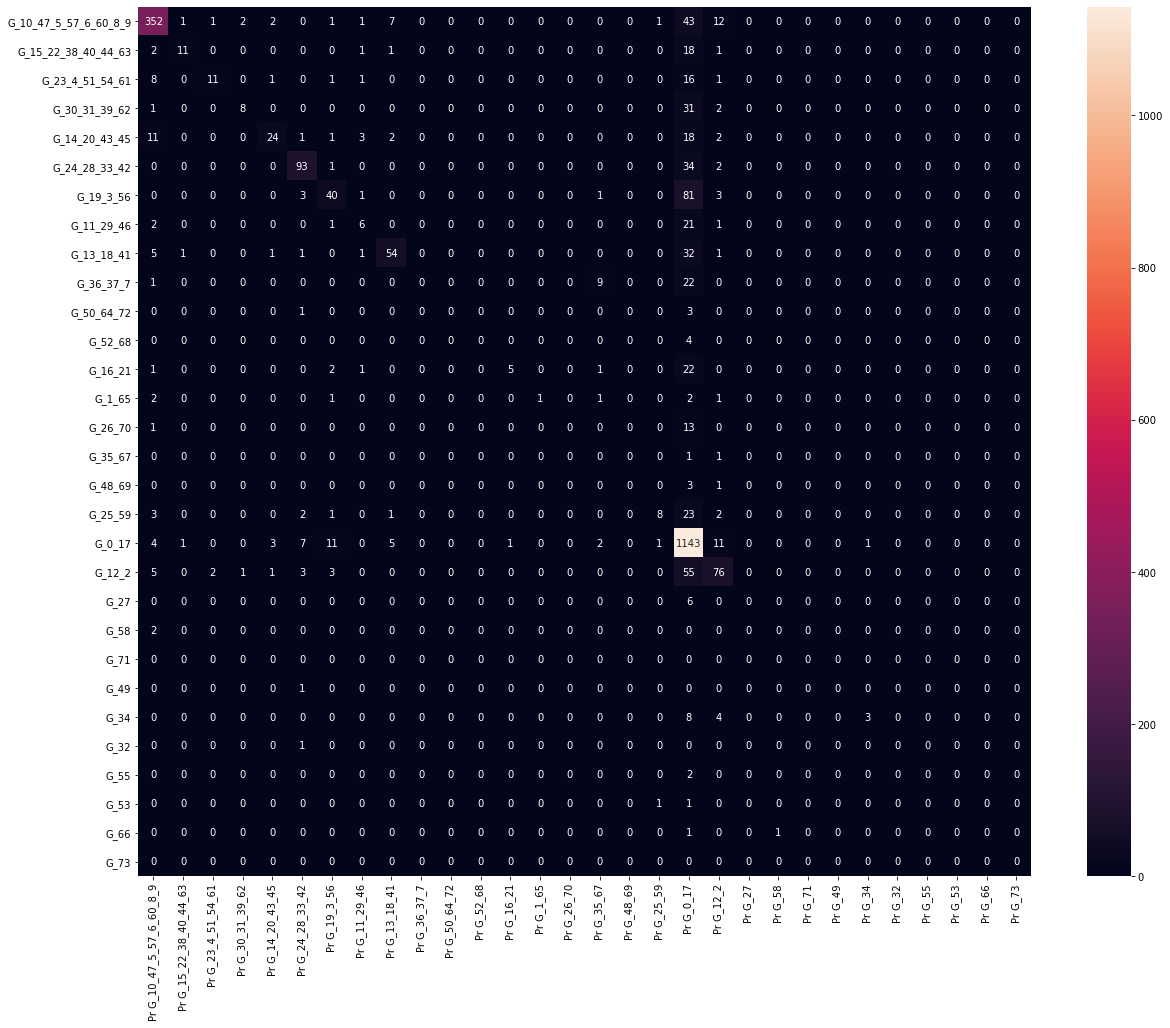

In [139]:
 #Logistic Regression weighted average
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test,'weighted avg')
#print("Logistic Regression weighted avg Count Vectorizer Report", report['weighted avg'])

Accuracy : 0.7244283995186522
Other metrics {'precision': 0.7469199471042915, 'recall': 0.7244283995186522, 'f1-score': 0.6839235195548602, 'support': 2493}

 Some random test predictions 

Title:	abended job jobscheduler job 
True labels:	G_10_47_5_57_6_60_8_9
Predicted labels:	G_10_47_5_57_6_60_8_9


Title:	job sihotf failed jobscheduler 
True labels:	G_10_47_5_57_6_60_8_9
Predicted labels:	G_10_47_5_57_6_60_8_9


Title:	clad qc computer moving new location computer moving new location new setup need completed production interrupted note shrugott tyhuellis may may entered ticket move
True labels:	G_19_3_56
Predicted labels:	G_0_17


Title:	access hostname imts folder team usa access imts folder server hostname
True labels:	G_34
Predicted labels:	G_12_2


Title:	send video someone outside company name aytjedki rucfplalanguage browser microsoft internet eploreremail customer number telephone summary send video someone outside company large attach email
True labels:	G_0_17
Predicted lab

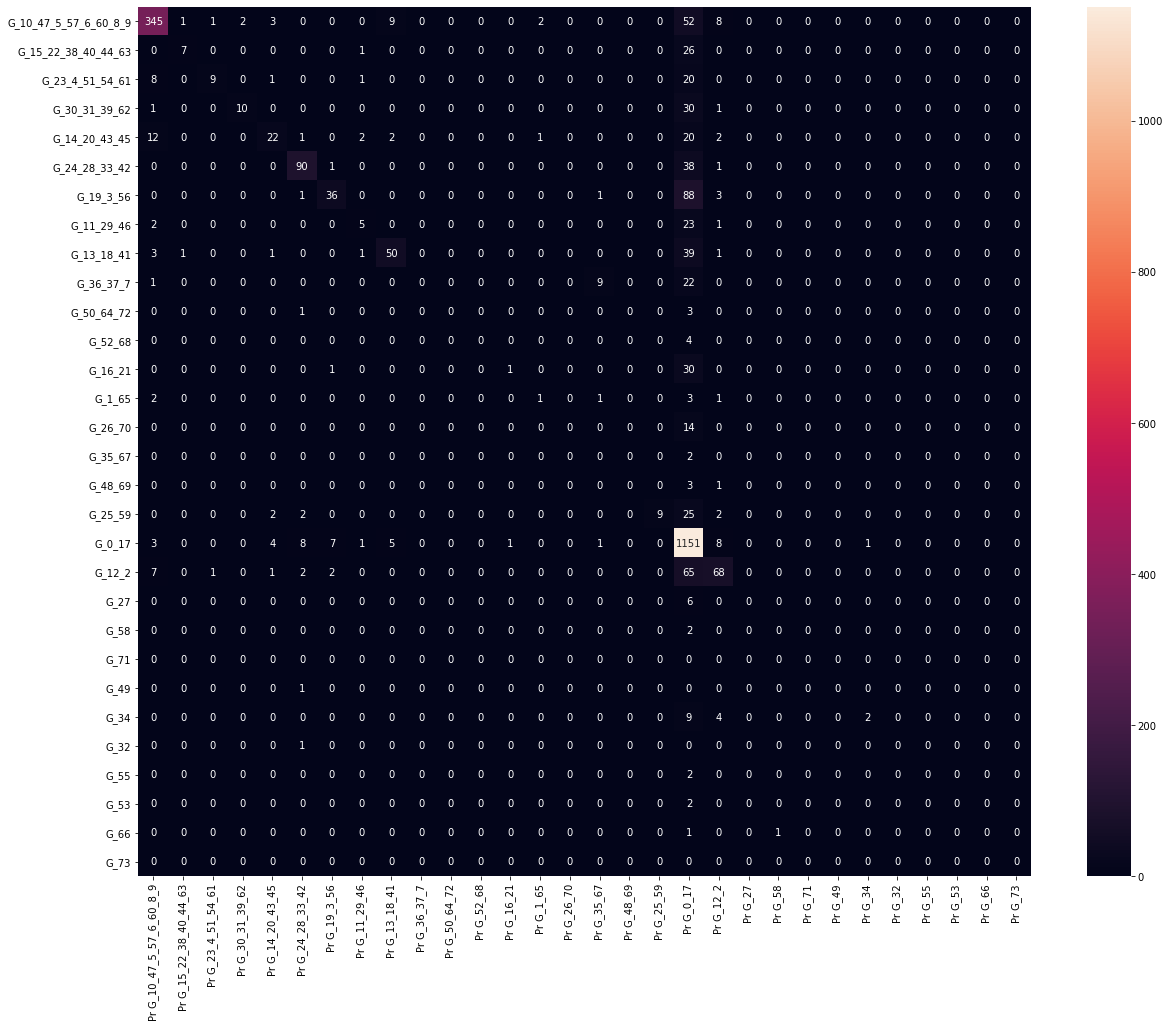

In [140]:
#svm weighted average
from sklearn.svm import SVC
classifier=SVC(gamma=0.01,C=10)
report = report_generation(classifier, X_train_vec, X_test_vec, y_train, y_test, 'weighted avg')
#print("svm weighted avg Count Vectorizer Report", report['weighted avg'])